In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!ls "/gdrive/My Drive/train001"

imagedata_train001_0_8408.npy		   my_model_train001_0_8408_512.h5
imagedata_train002_0_8394.npy		   train001.csv
imagedata_train004_0_8415.npy		   train002.csv
imagedata_train005_0_1427.npy		   train004.csv
my_model_train001004_0_8394_0_8415_512.h5  train005.csv
my_model_train001005_0_8394_0_1427_512.h5


Using TensorFlow backend.


             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(8394,)
0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
2019-02-24 15:25:10.815853
Train on 7554 samples, validate on 840 samples
Epoch 1/10
 - 31s - loss: 4.1566 - acc: 0.7408 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 2/10
 - 31s - loss: 4.1698 - acc: 0.7401 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 3/10
 - 31s - loss: 4.1687 - acc: 0.7405 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 4/10
 - 31s - loss: 4.1663 - acc: 0.7405 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 5/10
 - 31s - loss: 4.1598 - acc: 0.7407 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 6/10
 - 31s - loss: 4.1706 - acc: 0.7393 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 7/10
 - 31s - loss: 4.1623 - acc: 0.7407 - val_loss: 3.8952 - v

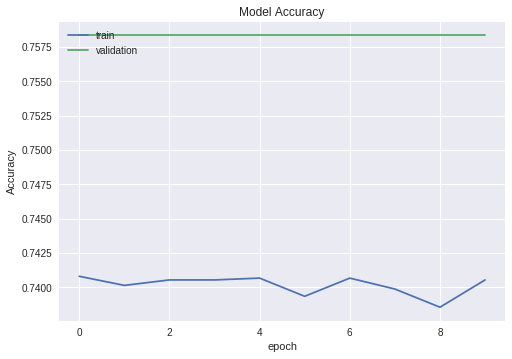

In [3]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train002_0_8394.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train002.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8394,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001004_0_8394_0_8415_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 10, verbose = 2, validation_split = 0.1)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001004002_0_8408_0_8415_0_8394_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(8394,)
0
2019-02-24 15:31:20.215147
Train on 6715 samples, validate on 1679 samples
Epoch 1/10
 - 29s - loss: 4.1573 - acc: 0.7407 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 2/10
 - 28s - loss: 4.1465 - acc: 0.7412 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 3/10
 - 28s - loss: 4.1526 - acc: 0.7413 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 4/10
 - 28s - loss: 4.1571 - acc: 0.7407 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 5/10
 - 28s - loss: 4.1497 - acc: 0.7410 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 6/10
 - 28s - loss: 4.1580 - acc: 0.7403 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 7/10
 - 28s - loss: 4.1519 - acc: 0.7416 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 8/10
 - 28s - loss: 4.1575 - acc: 0.7410 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 9/10
 - 28s - loss: 4.1498 - acc: 0.7418 - val_loss: 4.0799 - val_acc: 0.7469
Epoch 10/10
 - 28s - loss: 4.1566 - acc: 0.7412 - v

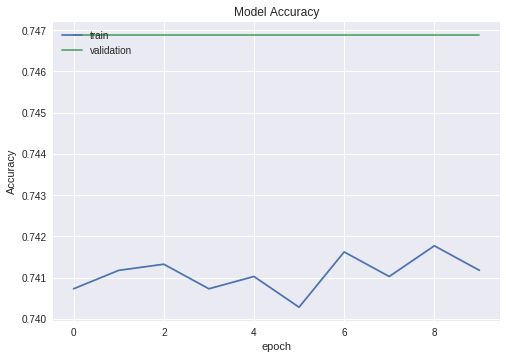

In [4]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train002_0_8394.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train002.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8394,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001004_0_8394_0_8415_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 10, verbose = 2, validation_split = 0.2)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001004002_0_8408_0_8415_0_8394_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(8394,)
0
2019-02-24 15:37:41.561765
Train on 7554 samples, validate on 840 samples
Epoch 1/10
 - 31s - loss: 4.1746 - acc: 0.7403 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 2/10
 - 30s - loss: 4.1741 - acc: 0.7401 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 3/10
 - 30s - loss: 4.1637 - acc: 0.7404 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 4/10
 - 30s - loss: 4.1754 - acc: 0.7397 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 5/10
 - 30s - loss: 4.1637 - acc: 0.7404 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 6/10
 - 30s - loss: 4.1655 - acc: 0.7399 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 7/10
 - 31s - loss: 4.1810 - acc: 0.7389 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 8/10
 - 30s - loss: 4.1717 - acc: 0.7403 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 9/10
 - 31s - loss: 4.1684 - acc: 0.7401 - val_loss: 3.8952 - val_acc: 0.7583
Epoch 10/10
 - 30s - loss: 4.1689 - acc: 0.7404 - va

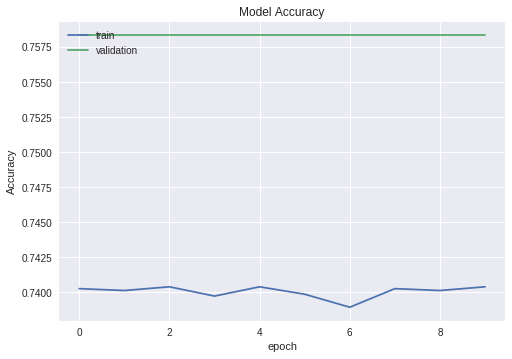

In [5]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train002_0_8394.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train002.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8394,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001004_0_8394_0_8415_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 10, verbose = 2, validation_split = 0.1)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001004002_0_8408_0_8415_0_8394_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()